In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gst-pred/Train_60 2/Instructions.txt
/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv
/kaggle/input/gst-pred/Train_60 2/correlation.PNG
/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv
/kaggle/input/gst-pred/Train_60 2/SHA_256.txt
/kaggle/input/gst-pred/Train_60 2/checksum.py
/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv
/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv


In [18]:
df = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv')
y_train=pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv')

In [19]:
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of null values for each column
print(null_percentage)

ID           0.000000
Column0      0.001146
Column1      0.000000
Column2      0.000000
Column3     16.086829
Column4     16.266034
Column5     21.293208
Column6      0.490363
Column7      0.000000
Column8      0.490363
Column9     93.250061
Column10     0.000000
Column11     0.000000
Column12     0.000000
Column13     0.000000
Column14    46.578478
Column15     2.095951
Column16     0.000000
Column17     0.000000
Column18     0.000000
Column19     0.000000
Column20     0.000000
Column21     0.000000
dtype: float64


In [20]:
missing_value_threshold = 0.25

# Calculate the ratio of missing values for each feature
missing_ratios = df.isnull().mean()

# Filter out features with too many missing values
selected_features = missing_ratios[missing_ratios <= missing_value_threshold].index

print("Selected Features (based on Missing Value Ratio):", selected_features)

Selected Features (based on Missing Value Ratio): Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20', 'Column21'],
      dtype='object')


In [21]:
columns_to_select = ['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20', 'Column21']

# Select these columns from the dataframe
X_train = df[columns_to_select]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column15  768677 non-null  float64
 15  Column16  785133 non-null  float64
 16  Column17  785133 non-null  int64  
 17  Column18  785133 non-null  float64
 18  Column19  785133 non-null  int64  
 19  Column20  785133 non-null  int64  
 20  Colu

In [22]:
null_percentage = (X_train.isnull().sum() / len(df)) * 100

# Display the percentage of null values for each column
print(null_percentage)

ID           0.000000
Column0      0.001146
Column1      0.000000
Column2      0.000000
Column3     16.086829
Column4     16.266034
Column5     21.293208
Column6      0.490363
Column7      0.000000
Column8      0.490363
Column10     0.000000
Column11     0.000000
Column12     0.000000
Column13     0.000000
Column15     2.095951
Column16     0.000000
Column17     0.000000
Column18     0.000000
Column19     0.000000
Column20     0.000000
Column21     0.000000
dtype: float64


In [23]:
# columns_with_null = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']
columns_to_remove = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']
X_train_trail = X_train.drop(columns=columns_to_remove)
X_train_trail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column7   785133 non-null  float64
 4   Column10  785133 non-null  int64  
 5   Column11  785133 non-null  int64  
 6   Column12  785133 non-null  int64  
 7   Column13  785133 non-null  int64  
 8   Column16  785133 non-null  float64
 9   Column17  785133 non-null  int64  
 10  Column18  785133 non-null  float64
 11  Column19  785133 non-null  int64  
 12  Column20  785133 non-null  int64  
 13  Column21  785133 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 83.9+ MB


In [24]:
data = pd.merge(X_train_trail, y_train, on='ID')
data.head()

ID  Column1  Column2   Column7  Column10  \
0  ad1a67e4cbddc767a3456b0d94299b9e     2495   3726.0 -0.015603         0   
1  7246d2f76ac0c217ec25e72ea5f014cb     2495   3454.0 -0.015574         0   
2  22ba388e7dd14c13342c49e75fc29dda     2495   4543.0 -0.015607         1   
3  59f9b981472d97342587fb3e6392aeb1      211     59.0 -0.015607         0   
4  f6317cf7ecf126859804eddff279aead      718    950.0 -0.015607         0   

   Column11  Column12  Column13  Column16  Column17  Column18  Column19  \
0         0         0         0       0.0         0       0.0         0   
1         0         0         0       0.0         0       0.0         0   
2         1         1         1       0.0         0       0.0         0   
3         0         0         0       0.0         0       1.0         0   
4         0         0         0       0.0         0       0.0         0   

   Column20  Column21  target  
0         0         0       0  
1         0         0       0  
2         0         0       0  
3         0         0       1  
4         0         0       0

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column7   785133 non-null  float64
 4   Column10  785133 non-null  int64  
 5   Column11  785133 non-null  int64  
 6   Column12  785133 non-null  int64  
 7   Column13  785133 non-null  int64  
 8   Column16  785133 non-null  float64
 9   Column17  785133 non-null  int64  
 10  Column18  785133 non-null  float64
 11  Column19  785133 non-null  int64  
 12  Column20  785133 non-null  int64  
 13  Column21  785133 non-null  int64  
 14  target    785133 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 89.9+ MB


In [25]:
df_test = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        261712 non-null  object 
 1   Column0   261710 non-null  float64
 2   Column1   261712 non-null  int64  
 3   Column2   261712 non-null  float64
 4   Column3   219478 non-null  float64
 5   Column4   219002 non-null  float64
 6   Column5   206053 non-null  float64
 7   Column6   260478 non-null  float64
 8   Column7   261712 non-null  float64
 9   Column8   260478 non-null  float64
 10  Column9   17859 non-null   float64
 11  Column10  261712 non-null  int64  
 12  Column11  261712 non-null  int64  
 13  Column12  261712 non-null  int64  
 14  Column13  261712 non-null  int64  
 15  Column14  140033 non-null  float64
 16  Column15  256227 non-null  float64
 17  Column16  261712 non-null  float64
 18  Column17  261712 non-null  int64  
 19  Column18  261712 non-null  float64
 20  Colu

In [26]:
columns_to_select = ['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20', 'Column21']

# Select these columns from the dataframe
df_test = df_test[columns_to_select]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        261712 non-null  object 
 1   Column0   261710 non-null  float64
 2   Column1   261712 non-null  int64  
 3   Column2   261712 non-null  float64
 4   Column3   219478 non-null  float64
 5   Column4   219002 non-null  float64
 6   Column5   206053 non-null  float64
 7   Column6   260478 non-null  float64
 8   Column7   261712 non-null  float64
 9   Column8   260478 non-null  float64
 10  Column10  261712 non-null  int64  
 11  Column11  261712 non-null  int64  
 12  Column12  261712 non-null  int64  
 13  Column13  261712 non-null  int64  
 14  Column15  256227 non-null  float64
 15  Column16  261712 non-null  float64
 16  Column17  261712 non-null  int64  
 17  Column18  261712 non-null  float64
 18  Column19  261712 non-null  int64  
 19  Column20  261712 non-null  int64  
 20  Colu

In [27]:
y_test = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv')
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      261712 non-null  object
 1   target  261712 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ MB


In [28]:
data_test = pd.merge(df_test, y_test, on='ID')
data_test.head()

ID  Column0  Column1  Column2   Column3  \
0  07cf2025382f6325b316e128b1b90999      1.0     1986     53.0  0.678139   
1  eb972eb3a1f8d0d1a13f45e7c07d37d4      2.0     1579     12.0  0.678139   
2  ee35e164b3ddc25a9f40243b81ad290d      0.0      898   3817.0 -2.028572   
3  28229ccd7bad7dd83324a4175a7e0531      0.0       79   3449.0 -0.675216   
4  2f94873da2c332d28f111742818e0fbb      1.0      646   6510.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column12  Column13  \
0  0.701403 -0.007469 -0.407939 -0.015607  0.554860  ...         1         1   
1  0.701403 -0.007468 -0.407939 -0.015607  0.142149  ...         1         0   
2 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0         0   
3 -0.577162 -0.007469  0.004020 -0.015607  0.635264  ...         0         1   
4 -1.855728       NaN -0.407939 -0.015434 -0.774979  ...         1         1   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       0.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 22 columns]

In [29]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        261712 non-null  object 
 1   Column0   261710 non-null  float64
 2   Column1   261712 non-null  int64  
 3   Column2   261712 non-null  float64
 4   Column3   219478 non-null  float64
 5   Column4   219002 non-null  float64
 6   Column5   206053 non-null  float64
 7   Column6   260478 non-null  float64
 8   Column7   261712 non-null  float64
 9   Column8   260478 non-null  float64
 10  Column10  261712 non-null  int64  
 11  Column11  261712 non-null  int64  
 12  Column12  261712 non-null  int64  
 13  Column13  261712 non-null  int64  
 14  Column15  256227 non-null  float64
 15  Column16  261712 non-null  float64
 16  Column17  261712 non-null  int64  
 17  Column18  261712 non-null  float64
 18  Column19  261712 non-null  int64  
 19  Column20  261712 non-null  int64  
 20  Colu

In [30]:
columns_to_remove = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']
X_test_trail = data_test.drop(columns=columns_to_remove)
X_test_trail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        261712 non-null  object 
 1   Column1   261712 non-null  int64  
 2   Column2   261712 non-null  float64
 3   Column7   261712 non-null  float64
 4   Column10  261712 non-null  int64  
 5   Column11  261712 non-null  int64  
 6   Column12  261712 non-null  int64  
 7   Column13  261712 non-null  int64  
 8   Column16  261712 non-null  float64
 9   Column17  261712 non-null  int64  
 10  Column18  261712 non-null  float64
 11  Column19  261712 non-null  int64  
 12  Column20  261712 non-null  int64  
 13  Column21  261712 non-null  int64  
 14  target    261712 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 30.0+ MB


In [32]:
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
X_t = data.drop(columns=['target', 'ID'])  # Features (all PCA components)
y_t = data['target']  # Target variable
X_tes = X_test_trail.drop(columns=['target', 'ID'])  # Features (all PCA components)
y_tes = X_test_trail['target']
# Initialize CatBoost models
cat_model = CatBoostClassifier(verbose=0, random_state=42, n_estimators=2000)


# Train the models
cat_model.fit(X_t, y_t)


# Make predictions on the test sets
y_pred = cat_model.predict(X_tes)
X_test_trail['predicted_class'] = y_pred
accuracy = accuracy_score(y_tes, y_pred)
print(classification_report(y_tes, y_pred))



              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.93      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.93    261712
weighted avg       0.98      0.98      0.98    261712



In [33]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9752


In [41]:
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
roc_auc = roc_auc_score(y_tes, cat_model.predict_proba(X_tes)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")
fpr, tpr, _ = roc_curve(y_tes, cat_model.predict_proba(X_tes)[:, 1])  # Use predicted probabilities

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC-AUC Score: 0.9937


In [34]:
X_test_trail.head()

ID  Column1  Column2   Column7  Column10  \
0  07cf2025382f6325b316e128b1b90999     1986     53.0 -0.015607         1   
1  eb972eb3a1f8d0d1a13f45e7c07d37d4     1579     12.0 -0.015607         0   
2  ee35e164b3ddc25a9f40243b81ad290d      898   3817.0 -0.015607         0   
3  28229ccd7bad7dd83324a4175a7e0531       79   3449.0 -0.015607         0   
4  2f94873da2c332d28f111742818e0fbb      646   6510.0 -0.015434         1   

   Column11  Column12  Column13  Column16  Column17  Column18  Column19  \
0         1         1         1       0.0         0       0.0         0   
1         1         1         0       0.0         0       0.0         0   
2         0         0         0       0.0         0       0.0         0   
3         1         0         1       0.0         0       0.0         0   
4         1         1         1       0.0         0       0.0         0   

   Column20  Column21  target  predicted_class  
0         0         0       0                0  
1         0         0       0                0  
2         0         0       0                0  
3         0         0       0                0  
4         0         0       0                0

In [35]:
data_test['predicted_class'] = X_test_trail['predicted_class']
data_test.head()

ID  Column0  Column1  Column2   Column3  \
0  07cf2025382f6325b316e128b1b90999      1.0     1986     53.0  0.678139   
1  eb972eb3a1f8d0d1a13f45e7c07d37d4      2.0     1579     12.0  0.678139   
2  ee35e164b3ddc25a9f40243b81ad290d      0.0      898   3817.0 -2.028572   
3  28229ccd7bad7dd83324a4175a7e0531      0.0       79   3449.0 -0.675216   
4  2f94873da2c332d28f111742818e0fbb      1.0      646   6510.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column15  \
0  0.701403 -0.007469 -0.407939 -0.015607  0.554860  ...         1   0.00339   
1  0.701403 -0.007468 -0.407939 -0.015607  0.142149  ...         0   0.00339   
2 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0   0.00339   
3 -0.577162 -0.007469  0.004020 -0.015607  0.635264  ...         1   0.00339   
4 -1.855728       NaN -0.407939 -0.015434 -0.774979  ...         1   0.00339   

   Column16  Column17  Column18  Column19  Column20  Column21  target  \
0       0.0         0       0.0         0         0         0       0   
1       0.0         0       0.0         0         0         0       0   
2       0.0         0       0.0         0         0         0       0   
3       0.0         0       0.0         0         0         0       0   
4       0.0         0       0.0         0         0         0       0   

   predicted_class  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 23 columns]

In [36]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               261712 non-null  object 
 1   Column0          261710 non-null  float64
 2   Column1          261712 non-null  int64  
 3   Column2          261712 non-null  float64
 4   Column3          219478 non-null  float64
 5   Column4          219002 non-null  float64
 6   Column5          206053 non-null  float64
 7   Column6          260478 non-null  float64
 8   Column7          261712 non-null  float64
 9   Column8          260478 non-null  float64
 10  Column10         261712 non-null  int64  
 11  Column11         261712 non-null  int64  
 12  Column12         261712 non-null  int64  
 13  Column13         261712 non-null  int64  
 14  Column15         256227 non-null  float64
 15  Column16         261712 non-null  float64
 16  Column17         261712 non-null  int6

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column15  768677 non-null  float64
 15  Column16  785133 non-null  float64
 16  Column17  785133 non-null  int64  
 17  Column18  785133 non-null  float64
 18  Column19  785133 non-null  int64  
 19  Column20  785133 non-null  int64  
 20  Colu

In [38]:
data_train = pd.merge(X_train, y_train, on='ID')
data_train.head()

ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column12  Column13  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0         0   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0         0   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1         1   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0         0   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0         0   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       1.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       1  
4       0  

[5 rows x 22 columns]

In [42]:
data_train = data_train.drop('ID', axis=1)
# Dictionary to store the mean of groupby medians for each column
columns_with_null = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']

# Loop through each column and fill NaN values with the median grouped by 'target'
for column in columns_with_null:
    data_train[column] = data_train[column].fillna(data_train.groupby('target')[column].transform('median'))

In [43]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785133 non-null  float64
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column3   785133 non-null  float64
 4   Column4   785133 non-null  float64
 5   Column5   785133 non-null  float64
 6   Column6   785133 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   785133 non-null  float64
 9   Column10  785133 non-null  int64  
 10  Column11  785133 non-null  int64  
 11  Column12  785133 non-null  int64  
 12  Column13  785133 non-null  int64  
 13  Column15  785133 non-null  float64
 14  Column16  785133 non-null  float64
 15  Column17  785133 non-null  int64  
 16  Column18  785133 non-null  float64
 17  Column19  785133 non-null  int64  
 18  Column20  785133 non-null  int64  
 19  Column21  785133 non-null  int64  
 20  targ

In [44]:
data_test = data_test.drop('ID', axis=1)
# Dictionary to store the mean of groupby medians for each column
columns_with_null = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']

# Loop through each column and fill NaN values with the median grouped by 'target'
for column in columns_with_null:
    data_test[column] = data_test[column].fillna(data_test.groupby('predicted_class')[column].transform('median'))

In [45]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Column0          261712 non-null  float64
 1   Column1          261712 non-null  int64  
 2   Column2          261712 non-null  float64
 3   Column3          261712 non-null  float64
 4   Column4          261712 non-null  float64
 5   Column5          261712 non-null  float64
 6   Column6          261712 non-null  float64
 7   Column7          261712 non-null  float64
 8   Column8          261712 non-null  float64
 9   Column10         261712 non-null  int64  
 10  Column11         261712 non-null  int64  
 11  Column12         261712 non-null  int64  
 12  Column13         261712 non-null  int64  
 13  Column15         261712 non-null  float64
 14  Column16         261712 non-null  float64
 15  Column17         261712 non-null  int64  
 16  Column18         261712 non-null  floa

In [47]:
X_train = data_train.drop(columns=['target'])  # Features (all PCA components)
y_train = data_train['target']  # Target variable
X_test = data_test.drop(columns=['target', 'predicted_class'])  # Features (all PCA components)
y_test = data_test['target']

Training with 200 estimators...
Training with 400 estimators...
Training with 600 estimators...
Training with 800 estimators...
Training with 1000 estimators...
Training with 1200 estimators...


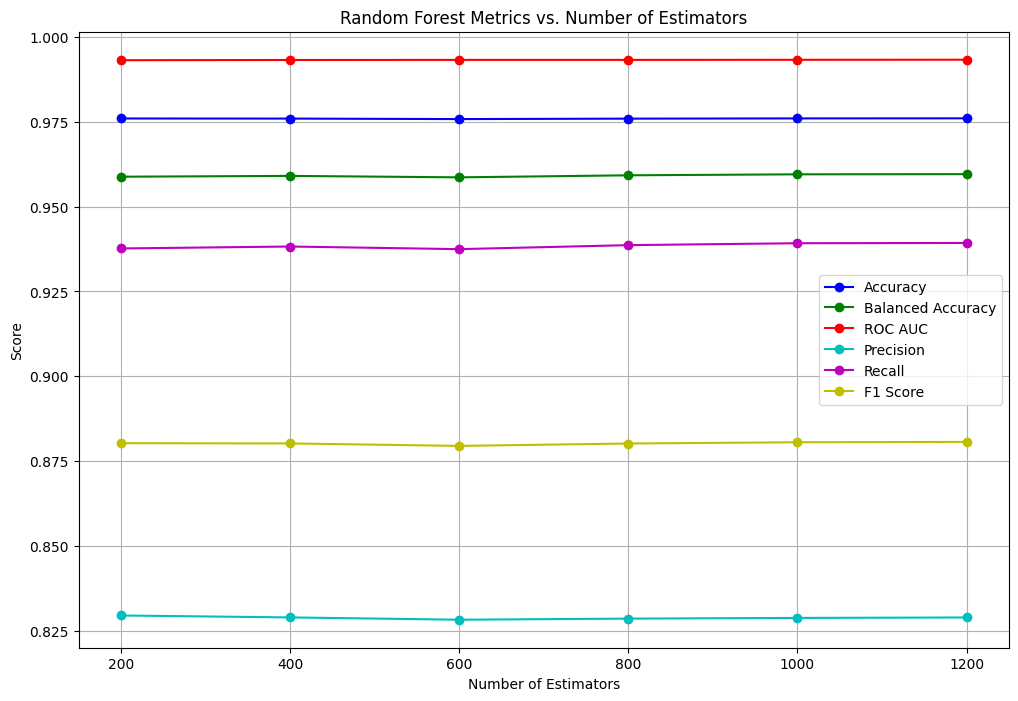

In [51]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, roc_auc_score,
                             precision_score, recall_score, f1_score, classification_report, confusion_matrix)
import matplotlib.pyplot as plt

# Define list of number of estimators to try
n_estimators_list = list(range(200, 1400, 200))

# Initialize lists to store metrics for each model
accuracies = []
balanced_accuracies = []
roc_aucs = []
precisions = []
recalls = []
f1_scores = []

# Loop through different numbers of estimators
for n_estimators in n_estimators_list:
    print(f"Training with {n_estimators} estimators...")
    
    # Define Random Forest model
    rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=n_estimators)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_accuracy)
    roc_aucs.append(roc_auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot the metrics vs. number of estimators
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.plot(n_estimators_list, accuracies, marker='o', label='Accuracy', color='b')

# Plot Balanced Accuracy
plt.plot(n_estimators_list, balanced_accuracies, marker='o', label='Balanced Accuracy', color='g')

# Plot ROC AUC
plt.plot(n_estimators_list, roc_aucs, marker='o', label='ROC AUC', color='r')

# Plot Precision
plt.plot(n_estimators_list, precisions, marker='o', label='Precision', color='c')

# Plot Recall
plt.plot(n_estimators_list, recalls, marker='o', label='Recall', color='m')

# Plot F1 Score
plt.plot(n_estimators_list, f1_scores, marker='o', label='F1 Score', color='y')

# Add labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Random Forest Metrics vs. Number of Estimators')
plt.legend(loc='best')

# Show the plot
plt.grid(True)
plt.show()


In [52]:
# Print the stored results for each number of estimators
print("Number of Estimators | Accuracy | Balanced Accuracy | ROC-AUC | Precision | Recall | F1 Score")
print("-" * 90)

for i, n_estimators in enumerate(n_estimators_list):
    print(f"{n_estimators:<18} | {accuracies[i]:<8.4f} | {balanced_accuracies[i]:<17.4f} | {roc_aucs[i]:<7.4f} | {precisions[i]:<9.4f} | {recalls[i]:<7.4f} | {f1_scores[i]:<8.4f}")


Number of Estimators | Accuracy | Balanced Accuracy | ROC-AUC | Precision | Recall | F1 Score
------------------------------------------------------------------------------------------
200                | 0.9760   | 0.9588            | 0.9931  | 0.8296    | 0.9377  | 0.8803  
400                | 0.9759   | 0.9590            | 0.9932  | 0.8290    | 0.9382  | 0.8802  
600                | 0.9758   | 0.9586            | 0.9932  | 0.8283    | 0.9375  | 0.8795  
800                | 0.9759   | 0.9592            | 0.9932  | 0.8286    | 0.9386  | 0.8802  
1000               | 0.9760   | 0.9595            | 0.9932  | 0.8289    | 0.9392  | 0.8806  
1200               | 0.9760   | 0.9596            | 0.9933  | 0.8290    | 0.9393  | 0.8807  


In [53]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Scaling the data using StandardScaler
scaler = StandardScaler()

# Apply scaling to all datasets (X_train, X_train_1, X_train_2 and corresponding test sets)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize XGBoost models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_estimators=1200, random_state=42, max_depth=10)


# Train the models
xgb_model.fit(X_train_scaled, y_train)


# Make predictions on the test sets
y_pred = xgb_model.predict(X_test_scaled)


# Evaluate model 1
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel 1 (XGBoost):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve for model 1
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1 (XGBoost)')
plt.legend(loc="lower right")
plt.show()


Model 1 (XGBoost):
Accuracy: 0.9758
Balanced Accuracy: 0.9459
ROC-AUC Score: 0.9927
Precision: 0.8459
Recall: 0.9091
F1 Score: 0.8764

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.91      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[232946   4088]
 [  2243  22435]]


In [54]:
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Initialize CatBoost models
cat_model = CatBoostClassifier(verbose=0, random_state=42, n_estimators=2000)


# Train the models
cat_model.fit(X_train, y_train)


# Make predictions on the test sets
y_pred = cat_model.predict(X_test)



# Evaluate model 1
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel 1 (CatBoost):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve for model 1
fpr, tpr, _ = roc_curve(y_test, cat_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1 (CatBoost)')
plt.legend(loc="lower right")
plt.show()


Model 1 (CatBoost):
Accuracy: 0.9777
Balanced Accuracy: 0.9539
ROC-AUC Score: 0.9936
Precision: 0.8515
Recall: 0.9247
F1 Score: 0.8866

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.92      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.94    261712
weighted avg       0.98      0.98      0.98    261712

Confusion Matrix:
[[233054   3980]
 [  1859  22819]]


[LightGBM] [Info] Number of positive: 74033, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 785133, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094294 -> initscore=-2.262302
[LightGBM] [Info] Start training from score -2.262302

Model 1 (LightGBM):
Accuracy: 0.9773
Balanced Accuracy: 0.9517
ROC-AUC Score: 0.9936
Precision: 0.8511
Recall: 0.9201
F1 Score: 0.8843

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.94    261712
weighted

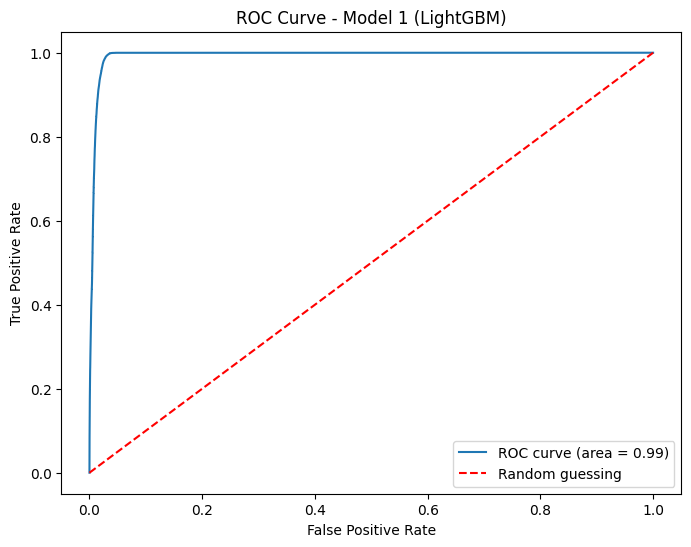

In [55]:
import lightgbm as lgb
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Initialize LightGBM models
lgb_model = lgb.LGBMClassifier(random_state=42,  n_estimators=2000)


# Train the models
lgb_model.fit(X_train_scaled, y_train)


# Make predictions on the test sets
y_pred_lgb = lgb_model.predict(X_test_scaled)


# Evaluate model 1
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb_model.predict_proba(X_test_scaled)[:, 1])
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print("\nModel 1 (LightGBM):")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_lgb:.4f}")
print(f"ROC-AUC Score: {roc_auc_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

# ROC Curve for model 1
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'ROC curve (area = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1 (LightGBM)')
plt.legend(loc="lower right")
plt.show()